# The Robert and Rosenbaum Uncertainty Zones model

# An application to USDJPY FX Futures at CME

## Implementation by
## Marcos Costa Santos Carreira (École Polytechnique - CMAP)
## and
## Florian Huchedé (CME)
## Aug-2019

## Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import glob

In [2]:
pd.set_option('display.max_columns', 50)

In [3]:
pd.set_option('display.max_rows', 200)

In [4]:
import cme_processing as cme

## File paths and initial values

In [5]:
PATHPROJ = '/Users/marcoscscarreira/Documents/X/CME project/CME_data/'
URL_ROOT = 'https://raw.githubusercontent.com/MarcosCarreira/UZStats/master/CME_data/'

In [6]:
CURR = 'JPY'

In [7]:
PATH_PRIOR = PATHPROJ+CURR+'/prior/'
PATH_AFTER = PATHPROJ+CURR+'/after/'
URL_1 = CURR+'/prior/'
URL_2 = CURR+'/after/'
#PATH_PRIOR = URL_ROOT+URL_1
#PATH_AFTER = URL_ROOT+URL_2

In [8]:
TRADING_HOURS = 8

In [9]:
TICK_PRIOR = 1.0
TICK_AFTER = 0.5

In [10]:
PRIOR_CDATES_LIST = [['6JH5', '20150105'],
 ['6JH5', '20150106'],
 ['6JH5', '20150107'],
 ['6JH5', '20150108'],
 ['6JH5', '20150109'],
 ['6JH5', '20150112'],
 ['6JH5', '20150113'],
 ['6JH5', '20150114'],
 ['6JH5', '20150115'],
 ['6JH5', '20150116'],
 ['6JH5', '20150119'],
 ['6JH5', '20150120'],
 ['6JH5', '20150121'],
 ['6JH5', '20150122'],
 ['6JH5', '20150123'],
 ['6JH5', '20150126'],
 ['6JH5', '20150127'],
 ['6JH5', '20150128'],
 ['6JH5', '20150129'],
 ['6JH5', '20150130'],
 ['6JH5', '20150202'],
 ['6JH5', '20150203'],
 ['6JH5', '20150204'],
 ['6JH5', '20150205'],
 ['6JH5', '20150206'],
 ['6JH5', '20150209'],
 ['6JH5', '20150210'],
 ['6JH5', '20150211'],
 ['6JH5', '20150212'],
 ['6JH5', '20150213'],
 ['6JH5', '20150223'],
 ['6JH5', '20150224'],
 ['6JH5', '20150225'],
 ['6JH5', '20150226'],
 ['6JH5', '20150227'],
 ['6JH5', '20150302'],
 ['6JH5', '20150303'],
 ['6JH5', '20150304'],
 ['6JH5', '20150305'],
 ['6JH5', '20150306'],
 ['6JH5', '20150309'],
 ['6JH5', '20150310'],
 ['6JH5', '20150311'],
 ['6JH5', '20150312'],
 ['6JH5', '20150313'],
 ['6JM5', '20150316'],
 ['6JM5', '20150317'],
 ['6JM5', '20150318'],
 ['6JM5', '20150319'],
 ['6JM5', '20150320'],
 ['6JM5', '20150323'],
 ['6JM5', '20150324'],
 ['6JM5', '20150325'],
 ['6JM5', '20150326'],
 ['6JM5', '20150327'],
 ['6JM5', '20150330'],
 ['6JM5', '20150331'],
 ['6JM5', '20150401'],
 ['6JM5', '20150402'],
 ['6JM5', '20150403'],
 ['6JM5', '20150406'],
 ['6JM5', '20150407'],
 ['6JM5', '20150408'],
 ['6JM5', '20150409'],
 ['6JM5', '20150410'],
 ['6JM5', '20150413'],
 ['6JM5', '20150414'],
 ['6JM5', '20150415'],
 ['6JM5', '20150416'],
 ['6JM5', '20150417'],
 ['6JM5', '20150420'],
 ['6JM5', '20150421'],
 ['6JM5', '20150422'],
 ['6JM5', '20150423'],
 ['6JM5', '20150424'],
 ['6JM5', '20150427'],
 ['6JM5', '20150428'],
 ['6JM5', '20150429'],
 ['6JM5', '20150430'],
 ['6JM5', '20150501'],
 ['6JM5', '20150504'],
 ['6JM5', '20150505'],
 ['6JM5', '20150506'],
 ['6JM5', '20150507'],
 ['6JM5', '20150508'],
 ['6JM5', '20150511'],
 ['6JM5', '20150512'],
 ['6JM5', '20150513'],
 ['6JM5', '20150514'],
 ['6JM5', '20150515'],
 ['6JM5', '20150518'],
 ['6JM5', '20150519'],
 ['6JM5', '20150520'],
 ['6JM5', '20150521'],
 ['6JM5', '20150522'],
 ['6JM5', '20150525'],
 ['6JM5', '20150526'],
 ['6JM5', '20150527'],
 ['6JM5', '20150528'],
 ['6JM5', '20150529'],
 ['6JM5', '20150601'],
 ['6JM5', '20150602'],
 ['6JM5', '20150603'],
 ['6JM5', '20150604'],
 ['6JM5', '20150605'],
 ['6JM5', '20150608'],
 ['6JM5', '20150609'],
 ['6JM5', '20150610'],
 ['6JM5', '20150611'],
 ['6JU5', '061215'],
 ['6JU5', '061515'],
 ['6JU5', '061615'],
 ['6JU5', '061715'],
 ['6JU5', '061815'],
 ['6JU5', '061915']]

In [11]:
AFTER_CDATES_LIST = [['6JU5', '062215'],
 ['6JU5', '062315'],
 ['6JU5', '062415'],
 ['6JU5', '062515'],
 ['6JU5', '062615'],
 ['6JU5', '062915'],
 ['6JU5', '063015'],
 ['6JU5', '070115'],
 ['6JU5', '070215'],
 ['6JU5', '070315'],
 ['6JU5', '070615'],
 ['6JU5', '070715'],
 ['6JU5', '070815'],
 ['6JU5', '070915'],
 ['6JU5', '071015'],
 ['6JU5', '20150713'],
 ['6JU5', '20150714'],
 ['6JU5', '20150715'],
 ['6JU5', '20150716'],
 ['6JU5', '20150717'],
 ['6JU5', '20150720'],
 ['6JU5', '20150721'],
 ['6JU5', '20150722'],
 ['6JU5', '20150723'],
 ['6JU5', '20150724'],
 ['6JU5', '20150727'],
 ['6JU5', '20150728'],
 ['6JU5', '20150729'],
 ['6JU5', '20150730'],
 ['6JU5', '20150731'],
 ['6JU5', '20150803'],
 ['6JU5', '20150804'],
 ['6JU5', '20150805'],
 ['6JU5', '20150806'],
 ['6JU5', '20150807'],
 ['6JU5', '20150810'],
 ['6JU5', '20150811'],
 ['6JU5', '20150812'],
 ['6JU5', '20150813'],
 ['6JU5', '20150814'],
 ['6JU5', '20150817'],
 ['6JU5', '20150818'],
 ['6JU5', '20150819'],
 ['6JU5', '20150820'],
 ['6JU5', '20150821'],
 ['6JU5', '20150824'],
 ['6JU5', '20150825'],
 ['6JU5', '20150826'],
 ['6JU5', '20150827'],
 ['6JU5', '20150828'],
 ['6JU5', '20150831'],
 ['6JU5', '20150901'],
 ['6JU5', '20150902'],
 ['6JU5', '20150903'],
 ['6JU5', '20150904'],
 ['6JU5', '20150907'],
 ['6JU5', '20150908'],
 ['6JU5', '20150909'],
 ['6JU5', '20150910'],
 ['6JU5', '20150911'],
 ['6JZ5', '20150914'],
 ['6JZ5', '20150915'],
 ['6JZ5', '20150916'],
 ['6JZ5', '20150917'],
 ['6JZ5', '20150918'],
 ['6JZ5', '20150921'],
 ['6JZ5', '20150922'],
 ['6JZ5', '20150923'],
 ['6JZ5', '20150924'],
 ['6JZ5', '20150925'],
 ['6JZ5', '20150928'],
 ['6JZ5', '20150929'],
 ['6JZ5', '20150930'],
 ['6JZ5', '20151001'],
 ['6JZ5', '20151002'],
 ['6JZ5', '20151005'],
 ['6JZ5', '20151006'],
 ['6JZ5', '20151007'],
 ['6JZ5', '20151008'],
 ['6JZ5', '20151009'],
 ['6JZ5', '20151012'],
 ['6JZ5', '20151013'],
 ['6JZ5', '20151014'],
 ['6JZ5', '20151015'],
 ['6JZ5', '20151016'],
 ['6JZ5', '20151019'],
 ['6JZ5', '20151020'],
 ['6JZ5', '20151021'],
 ['6JZ5', '20151022'],
 ['6JZ5', '20151023'],
 ['6JZ5', '20151026'],
 ['6JZ5', '20151027'],
 ['6JZ5', '20151028'],
 ['6JZ5', '20151029'],
 ['6JZ5', '20151030'],
 ['6JZ5', '20151102'],
 ['6JZ5', '20151103'],
 ['6JZ5', '20151104'],
 ['6JZ5', '20151105'],
 ['6JZ5', '20151106'],
 ['6JZ5', '20151109'],
 ['6JZ5', '20151110'],
 ['6JZ5', '20151111'],
 ['6JZ5', '20151112'],
 ['6JZ5', '20151113'],
 ['6JZ5', '20151116'],
 ['6JZ5', '20151117'],
 ['6JZ5', '20151118'],
 ['6JZ5', '20151119'],
 ['6JZ5', '20151120'],
 ['6JZ5', '20151123'],
 ['6JZ5', '20151124'],
 ['6JZ5', '20151125'],
 ['6JZ5', '20151126'],
 ['6JZ5', '20151127'],
 ['6JZ5', '20151130'],
 ['6JZ5', '20151201'],
 ['6JZ5', '20151202'],
 ['6JZ5', '20151203'],
 ['6JZ5', '20151204'],
 ['6JZ5', '20151207'],
 ['6JZ5', '20151208'],
 ['6JZ5', '20151209'],
 ['6JZ5', '20151210'],
 ['6JZ5', '20151211']]

### Processing files

#### Prior

In [12]:
#PRIOR_CDATES_LIST = cme.list_files(PATH_PRIOR)

In [13]:
#PRIOR_CDATES_LIST

In [14]:
PRIOR_CDATES, FILES_PRIOR_CAticks, FILES_PRIOR_COSTtrades,\
    FILES_PRIOR_OBstats, FILES_PRIOR_OTtrans,\
    FILES_PRIOR_RDFtrans, FILES_PRIOR_UZstats = \
    cme.process_files(PATH_PRIOR, PRIOR_CDATES_LIST, 'prior', TICK_PRIOR)

In [15]:
PRIOR_OB_UZ_STATS = cme.ob_uz_stats(PRIOR_CDATES, FILES_PRIOR_OBstats,\
    FILES_PRIOR_UZstats, FILES_PRIOR_CAticks, TRADING_HOURS)

In [16]:
PRIOR_IMBAL_STATS = cme.imbal_stats(PRIOR_CDATES, FILES_PRIOR_OTtrans)

In [17]:
PRIOR_IMBAL_STATS_TS = cme.time_series_imbal(PRIOR_IMBAL_STATS, pd.to_datetime(PRIOR_CDATES['Date']), 'prior')

In [18]:
PRIOR_IMBAL_STATS_TS['eta1'] = PRIOR_OB_UZ_STATS['eta1'].values

In [19]:
PRIOR_TRADE_STATS_TS = cme.time_series_imbal_trd(PRIOR_IMBAL_STATS, pd.to_datetime(PRIOR_CDATES['Date']), 'prior')

In [20]:
PRIOR_DEPL_STATS = cme.depl_stats(PRIOR_CDATES, FILES_PRIOR_RDFtrans)

In [21]:
PRIOR_DEPL_STATS_TS = cme.time_series_depl(PRIOR_DEPL_STATS, pd.to_datetime(PRIOR_CDATES['Date']), 'prior')

In [22]:
PRIOR_DEPL_STATS_TS['eta1'] = PRIOR_OB_UZ_STATS['eta1'].values

In [23]:
PRIOR_COST_STATS = cme.cost_stats(PRIOR_CDATES, FILES_PRIOR_COSTtrades)

In [24]:
PRIOR_COST_STATS['Status'] = 'prior'

#### After

In [25]:
#AFTER_CDATES_LIST = cme.list_files(PATH_AFTER)

In [26]:
#AFTER_CDATES_LIST

In [27]:
AFTER_CDATES, FILES_AFTER_CAticks, FILES_AFTER_COSTtrades,\
    FILES_AFTER_OBstats, FILES_AFTER_OTtrans,\
    FILES_AFTER_RDFtrans, FILES_AFTER_UZstats = \
    cme.process_files(PATH_AFTER, AFTER_CDATES_LIST, 'after', TICK_AFTER)

In [28]:
AFTER_OB_UZ_STATS = cme.ob_uz_stats(AFTER_CDATES, FILES_AFTER_OBstats,\
    FILES_AFTER_UZstats, FILES_AFTER_CAticks, TRADING_HOURS)

In [29]:
AFTER_IMBAL_STATS = cme.imbal_stats(AFTER_CDATES, FILES_AFTER_OTtrans)

In [30]:
AFTER_IMBAL_STATS_TS = cme.time_series_imbal(AFTER_IMBAL_STATS, pd.to_datetime(AFTER_CDATES['Date']), 'after')

In [31]:
AFTER_IMBAL_STATS_TS['eta1'] = AFTER_OB_UZ_STATS['eta1'].values

In [32]:
AFTER_TRADE_STATS_TS = cme.time_series_imbal_trd(AFTER_IMBAL_STATS, pd.to_datetime(AFTER_CDATES['Date']), 'after')

In [33]:
AFTER_DEPL_STATS = cme.depl_stats(AFTER_CDATES, FILES_AFTER_RDFtrans)

In [34]:
AFTER_DEPL_STATS_TS = cme.time_series_depl(AFTER_DEPL_STATS, pd.to_datetime(AFTER_CDATES['Date']), 'after')

In [35]:
AFTER_DEPL_STATS_TS['eta1'] = AFTER_OB_UZ_STATS['eta1'].values

In [36]:
AFTER_COST_STATS = cme.cost_stats(AFTER_CDATES, FILES_AFTER_COSTtrades)

In [37]:
AFTER_COST_STATS['Status'] = 'after'

#### Join prior and after

In [38]:
OB_UZ_STATS = pd.concat([PRIOR_OB_UZ_STATS, AFTER_OB_UZ_STATS], sort=False)

In [39]:
IMBAL_STATS_TS = pd.concat([PRIOR_IMBAL_STATS_TS, AFTER_IMBAL_STATS_TS], sort=False)

In [40]:
TRADE_STATS_TS = pd.concat([PRIOR_TRADE_STATS_TS, AFTER_TRADE_STATS_TS], sort=False)

In [41]:
DEPL_STATS_TS = pd.concat([PRIOR_DEPL_STATS_TS, AFTER_DEPL_STATS_TS], sort=False)

### Tables

In [42]:
TABLE_MATHIEU = cme.table_mathieu(OB_UZ_STATS)
TABLE_MATHIEU_ERR = cme.table_mathieu_err(OB_UZ_STATS)

In [43]:
TABLE_MATHIEU

,Tick,chgavg,ndfpr_pred,ndfpr,M,Volume,eta1,S1,lambda1,twspr1,duration,dt_avg,rvxe,spot_avg
Status,,,,,,,,,,,,,,
prior,1.0,1.01163,1790.45673,1652.73043,10935.69565,62169.18261,0.23478,0.98981,0.99108,1.53734,23.82115,20.87665,0.00338,8330.25861
after,0.5,0.51779,4780.65090,3243.02400,14735.14400,58368.18400,0.33526,0.96440,0.97412,1.92950,13.49946,12.14663,0.00304,8205.78421


In [44]:
TABLE_MATHIEU_ERR

,Tick,chgavg,ndfpr_pred,ndfpr,M,Volume,eta1,S1,lambda1,twspr1,duration,dt_avg,rvxe,spot_avg
Status,,,,,,,,,,,,,,
prior,0.0,0.01752,1176.51258,874.19658,5360.39841,27130.03481,0.05991,0.00976,0.01038,0.40057,15.30887,8.89586,0.00126,135.79880
after,0.0,0.02885,10030.01999,2869.86924,7631.25177,28865.15467,0.06553,0.03886,0.03302,1.35358,13.44712,7.12157,0.00184,119.81858


In [45]:
cme.avg_perc_mat(PRIOR_IMBAL_STATS, pd.to_datetime(PRIOR_CDATES['Date']))

,Trade_Bid,Imbal_Bid,Neutral,Imbal_Ask,Trade_Ask,Total Cols
Trade_Bid,2.30,1.35,0.26,0.08,0.00,3.99
Imbal_Bid,0.86,26.44,1.06,0.04,0.22,28.62
Neutral,0.60,0.72,31.95,0.72,0.58,34.58
Imbal_Ask,0.22,0.04,1.06,26.63,0.86,28.81
Trade_Ask,0.00,0.07,0.25,1.34,2.34,4.00
Total Rows,3.99,28.62,34.58,28.81,4.00,100.00


In [46]:
cme.avg_perc_mat(AFTER_IMBAL_STATS, pd.to_datetime(AFTER_CDATES['Date']))

,Trade_Bid,Imbal_Bid,Neutral,Imbal_Ask,Trade_Ask,Total Cols
Trade_Bid,0.89,1.04,0.27,0.09,0.00,2.28
Imbal_Bid,0.60,24.50,1.63,0.15,0.23,27.11
Neutral,0.57,1.34,37.18,1.34,0.56,40.99
Imbal_Ask,0.24,0.15,1.63,24.72,0.59,27.33
Trade_Ask,0.00,0.08,0.27,1.03,0.90,2.29
Total Rows,2.28,27.11,40.99,27.33,2.29,100.00


In [47]:
cme.avg_perc_mat_2(PRIOR_DEPL_STATS, pd.to_datetime(PRIOR_CDATES['Date']))

same                     oppo                    Total Cols
             D C   D T  D T+F    F    D C    D T  D T+F   F             
 D C         0.03  0.02  0.11  17.37  0.04   0.01  2.34  0.62      20.54
 D T         0.01  0.04  0.52  18.16  0.01   0.01  3.80  2.67      25.22
D T+F        0.01  0.01  0.24   5.80  0.00   0.01  1.53  0.94       8.54
  F         12.65  8.62  0.00   0.05  7.78  16.50  0.00  0.08      45.70
Total Rows  12.70  8.70  0.87  41.38  7.84  16.53  7.67  4.31     100.00

In [48]:
cme.avg_perc_mat_2(AFTER_DEPL_STATS, pd.to_datetime(AFTER_CDATES['Date']))

same                     oppo                    Total Cols
             D C   D T  D T+F    F    D C    D T  D T+F   F             
 D C         0.05  0.05  0.14  23.83  0.04   0.02  1.24  1.48      26.84
 D T         0.02  0.09  0.48  13.85  0.04   0.02  2.22  4.06      20.79
D T+F        0.02  0.02  0.18   3.08  0.01   0.01  0.59  0.94       4.86
  F         19.35  7.31  0.00   0.14  7.31  13.28  0.00  0.12      47.51
Total Rows  19.43  7.47  0.81  40.91  7.40  13.33  4.05  6.60     100.00

## Charts and Regressions

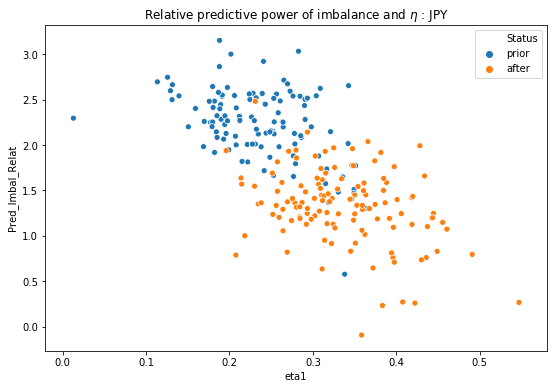

In [49]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='Pred_Imbal_Relat', hue='Status',\
           data=IMBAL_STATS_TS);
plt.title('Relative predictive power of imbalance and $\eta$ : '+CURR);

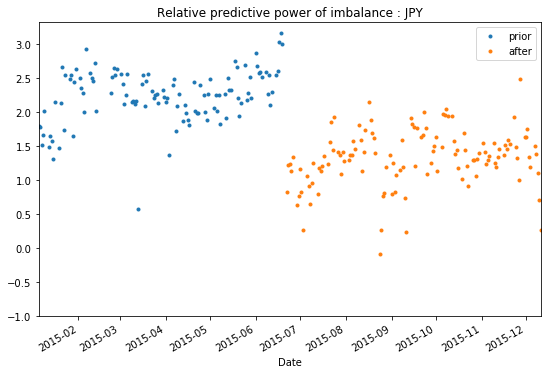

In [50]:
cme.time_series_plot(IMBAL_STATS_TS, 'Pred_Imbal_Relat',\
    'Relative predictive power of imbalance : '+CURR, -1)

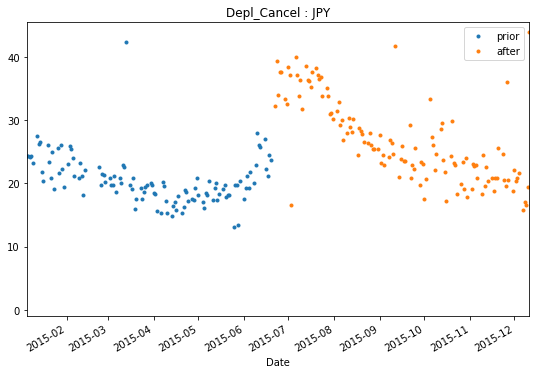

In [51]:
cme.time_series_plot(DEPL_STATS_TS, 'Depl_Cancel',\
    'Depl_Cancel : '+CURR, -1)

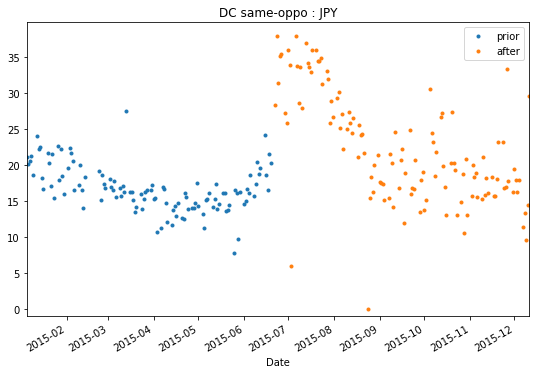

In [52]:
cme.time_series_plot(DEPL_STATS_TS, 'DC same-oppo',\
    'DC same-oppo : '+CURR, -1)

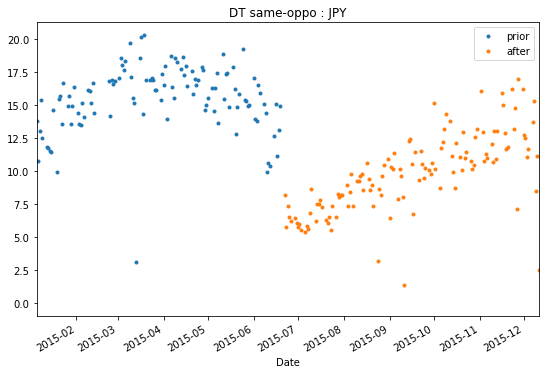

In [53]:
cme.time_series_plot(DEPL_STATS_TS, 'DT same-oppo',\
    'DT same-oppo : '+CURR, -1)

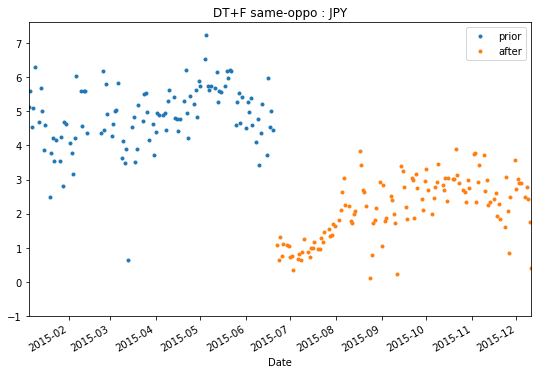

In [54]:
cme.time_series_plot(DEPL_STATS_TS, 'DT+F same-oppo',\
    'DT+F same-oppo : '+CURR, -1)

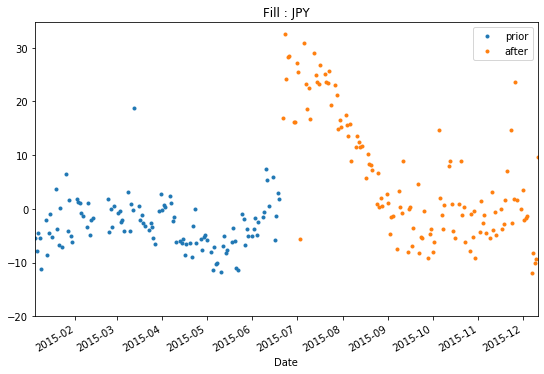

In [55]:
cme.time_series_plot(DEPL_STATS_TS, 'Fill same-oppo',\
    'Fill : '+CURR, -20)

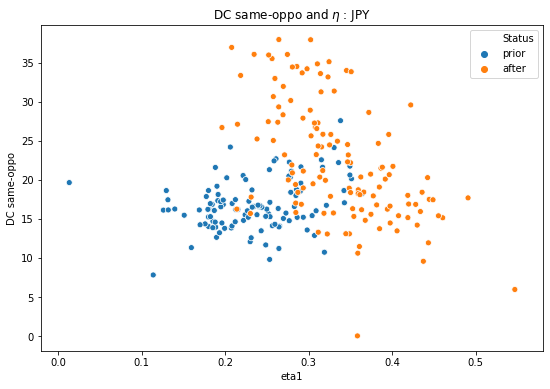

In [56]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='DC same-oppo', hue='Status',\
           data=DEPL_STATS_TS);
plt.title('DC same-oppo and $\eta$ : '+CURR);

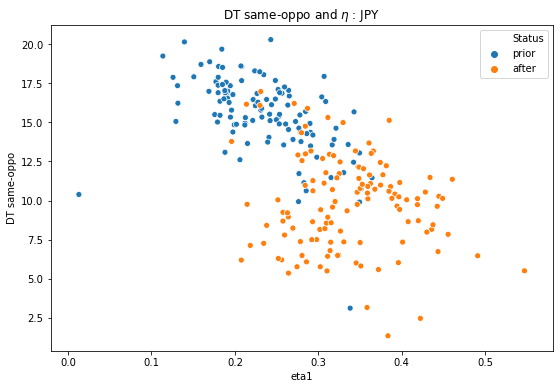

In [57]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='DT same-oppo', hue='Status',\
           data=DEPL_STATS_TS);
plt.title('DT same-oppo and $\eta$ : '+CURR);

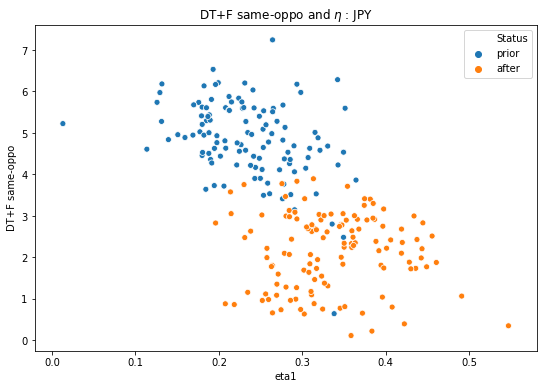

In [58]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='DT+F same-oppo', hue='Status',\
           data=DEPL_STATS_TS);
plt.title('DT+F same-oppo and $\eta$ : '+CURR);

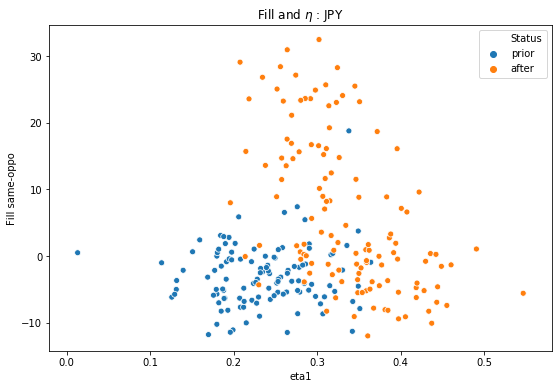

In [59]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='Fill same-oppo', hue='Status',\
           data=DEPL_STATS_TS);
plt.title('Fill and $\eta$ : '+CURR);

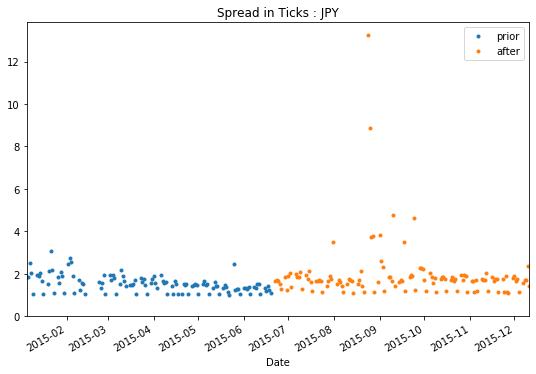

In [60]:
cme.time_series_plot(OB_UZ_STATS, 'twspr1', 'Spread in Ticks : '+CURR)

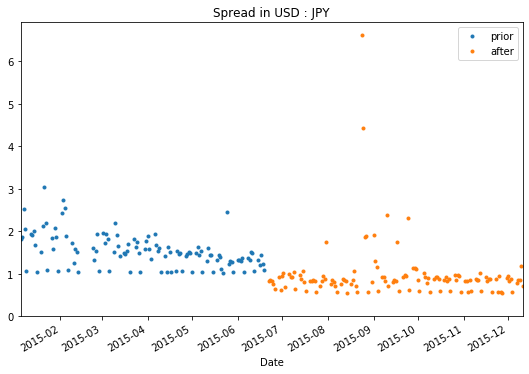

In [61]:
cme.twspr_plot_USD(OB_UZ_STATS, CURR)

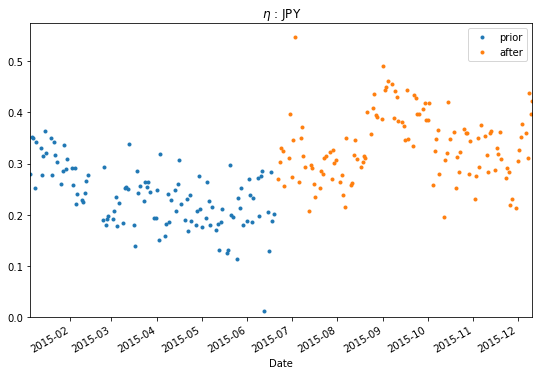

In [62]:
cme.time_series_plot(OB_UZ_STATS, 'eta1', '$\eta$ : '+CURR)

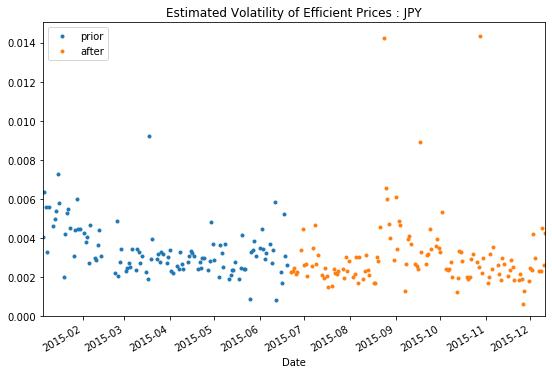

In [63]:
cme.time_series_plot(OB_UZ_STATS, 'rvxe',\
    'Estimated Volatility of Efficient Prices : '+CURR)

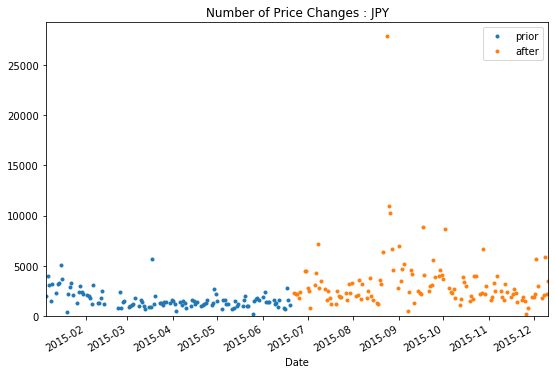

In [64]:
cme.time_series_plot(OB_UZ_STATS, 'ndfpr',\
    'Number of Price Changes : '+CURR)

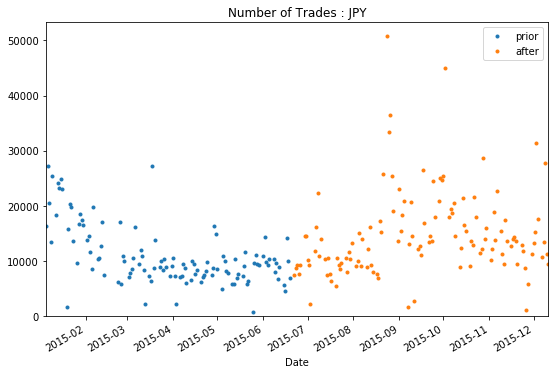

In [65]:
cme.time_series_plot(OB_UZ_STATS, 'M',\
    'Number of Trades : '+CURR)

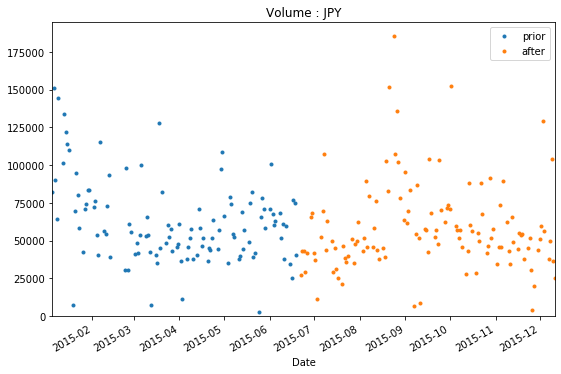

In [66]:
cme.time_series_plot(OB_UZ_STATS, 'Volume',\
    'Volume : '+CURR)

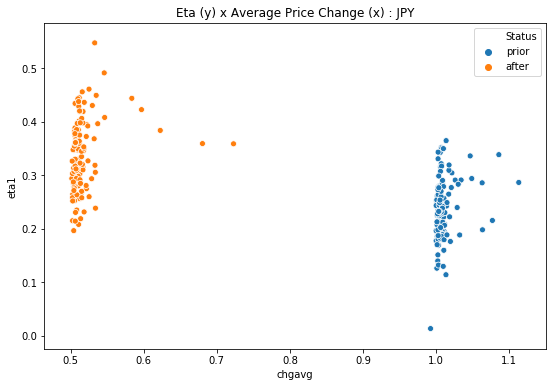

In [67]:
cme.scatter_plot(OB_UZ_STATS, 'chgavg', 'eta1',\
    'Eta (y) x Average Price Change (x) : '+CURR)

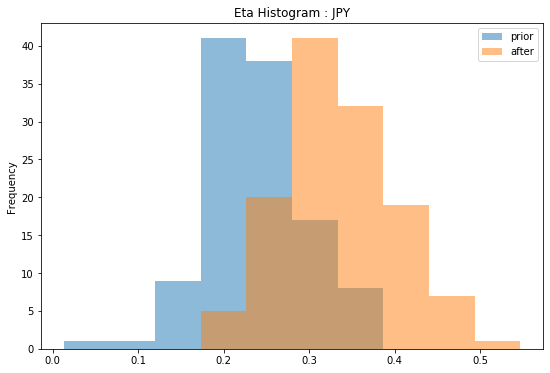

In [68]:
cme.time_series_hist(OB_UZ_STATS, 'eta1',\
    'Eta Histogram : '+CURR)

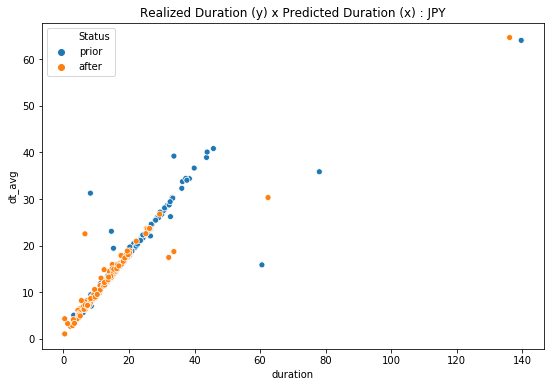

In [69]:
cme.scatter_plot(OB_UZ_STATS, 'duration', 'dt_avg',\
    'Realized Duration (y) x Predicted Duration (x) : '+CURR)

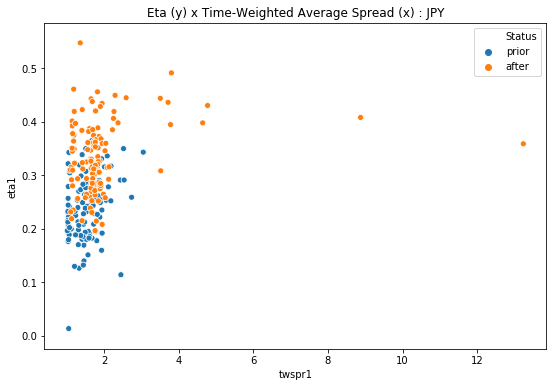

In [70]:
cme.scatter_plot(OB_UZ_STATS, 'twspr1', 'eta1',\
    'Eta (y) x Time-Weighted Average Spread (x) : '+CURR)

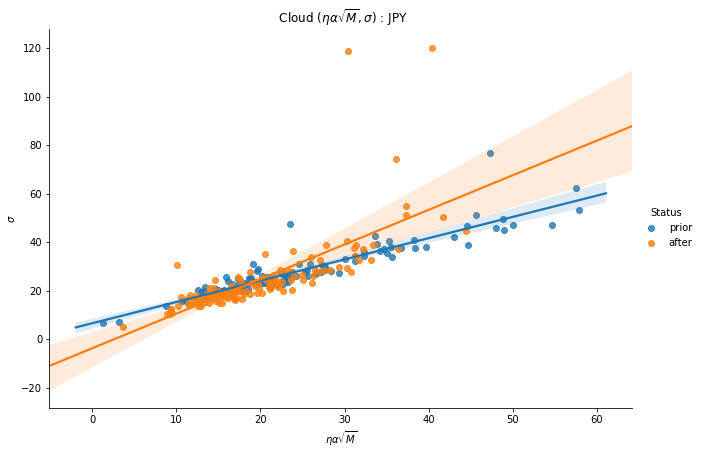

In [71]:
cme.cloud1(OB_UZ_STATS, CURR)

In [72]:
cme.lin_reg(PRIOR_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')

                            OLS Regression Results                            
Dep. Variable:                  sigma   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     324.9
Date:                Fri, 06 Sep 2019   Prob (F-statistic):           2.37e-47
Time:                        01:05:23   Log-Likelihood:                -324.93
No. Observations:                 115   AIC:                             655.9
Df Residuals:                     112   BIC:                             664.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.2048      1.02

/Users/marcoscscarreira/anaconda3/envs/CondaEnv36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [73]:
cme.lin_reg(AFTER_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')

                            OLS Regression Results                            
Dep. Variable:                  sigma   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     121.6
Date:                Fri, 06 Sep 2019   Prob (F-statistic):           8.89e-30
Time:                        01:05:23   Log-Likelihood:                -450.63
No. Observations:                 125   AIC:                             907.3
Df Residuals:                     122   BIC:                             915.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0011      2.30

In [74]:
# OB_UZ_STATS['p1*eta*alpha*sqrt(M)'] = \
#     cme.lin_reg_params(PRIOR_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['eta*alpha*sqrt(M)']\
#     *OB_UZ_STATS['eta*alpha*sqrt(M)']
# OB_UZ_STATS['sigma-p2*S*sqrt(M)'] = OB_UZ_STATS['sigma']-\
#     cme.lin_reg_params(PRIOR_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['S*sqrt(M)']*\
#     OB_UZ_STATS['S*sqrt(M)']

In [75]:
OB_UZ_STATS['p1*eta*alpha*sqrt(M)'] = np.where(OB_UZ_STATS['Status']=='prior',\
    cme.lin_reg_params(PRIOR_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['eta*alpha*sqrt(M)'],\
    cme.lin_reg_params(AFTER_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['eta*alpha*sqrt(M)'])\
    *OB_UZ_STATS['eta*alpha*sqrt(M)']
OB_UZ_STATS['sigma-p2*S*sqrt(M)'] = OB_UZ_STATS['sigma']-\
    np.where(OB_UZ_STATS['Status']=='prior',\
    cme.lin_reg_params(PRIOR_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['S*sqrt(M)'],\
    cme.lin_reg_params(AFTER_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['S*sqrt(M)'])*\
    OB_UZ_STATS['S*sqrt(M)']

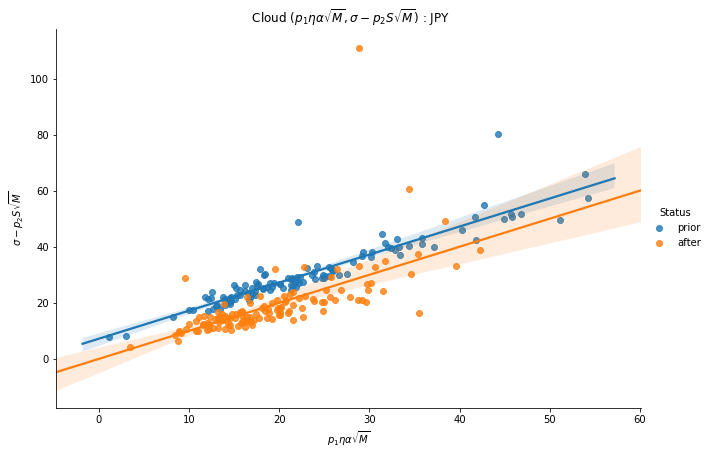

In [76]:
cme.cloud2(OB_UZ_STATS, CURR)

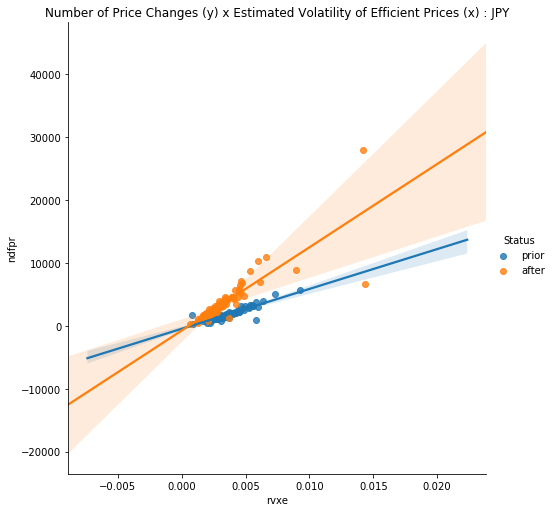

In [77]:
cme.regr_plot(OB_UZ_STATS, 'rvxe', 'ndfpr',\
    'Number of Price Changes (y) x Estimated Volatility of Efficient Prices (x) : '+CURR)

In [78]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'rvxe', 'ndfpr', True)

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     280.6
Date:                Fri, 06 Sep 2019   Prob (F-statistic):           2.10e-32
Time:                        01:05:24   Log-Likelihood:                -7.5938
No. Observations:                 115   AIC:                             19.19
Df Residuals:                     113   BIC:                             24.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8011      0.389     35.460      0.0

In [79]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'rvxe', 'ndfpr', True)

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     721.4
Date:                Fri, 06 Sep 2019   Prob (F-statistic):           2.73e-53
Time:                        01:05:24   Log-Likelihood:                 7.1719
No. Observations:                 125   AIC:                            -10.34
Df Residuals:                     123   BIC:                            -4.687
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.6905      0.291     53.879      0.0

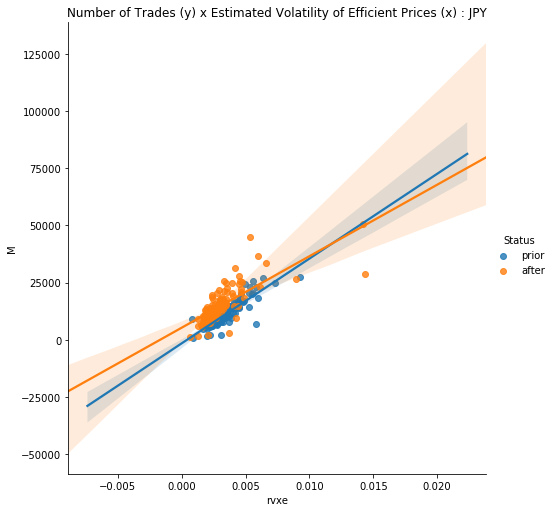

In [80]:
cme.regr_plot(OB_UZ_STATS, 'rvxe', 'M',\
    'Number of Trades (y) x Estimated Volatility of Efficient Prices (x) : '+CURR)

In [81]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'rvxe', 'M', True)

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     194.7
Date:                Fri, 06 Sep 2019   Prob (F-statistic):           2.45e-26
Time:                        01:05:25   Log-Likelihood:                -32.355
No. Observations:                 115   AIC:                             68.71
Df Residuals:                     113   BIC:                             74.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.9005      0.483     32.941      0.0

In [82]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'rvxe', 'M', True)

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     169.3
Date:                Fri, 06 Sep 2019   Prob (F-statistic):           7.09e-25
Time:                        01:05:25   Log-Likelihood:                -47.217
No. Observations:                 125   AIC:                             98.43
Df Residuals:                     123   BIC:                             104.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.3093      0.450     34.023      0.0

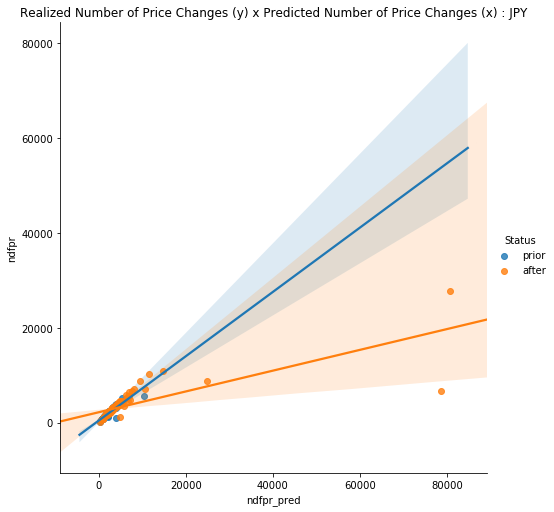

In [83]:
cme.regr_plot(OB_UZ_STATS, 'ndfpr_pred', 'ndfpr',\
    'Realized Number of Price Changes (y) x Predicted Number of Price Changes (x) : '+CURR)

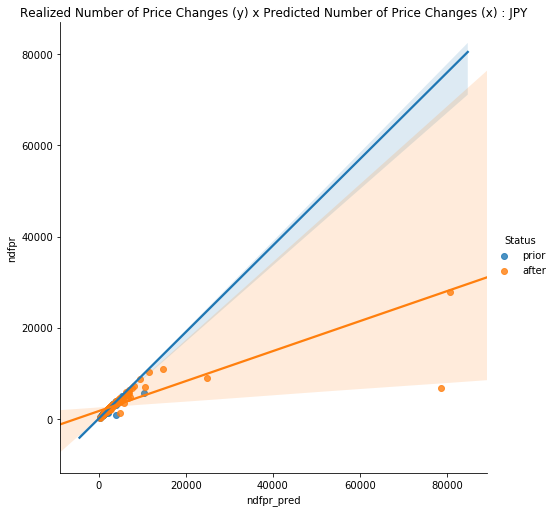

In [84]:
cme.regr_plot(OB_UZ_STATS, 'ndfpr_pred', 'ndfpr',\
    'Realized Number of Price Changes (y) x Predicted Number of Price Changes (x) : '+CURR, True)

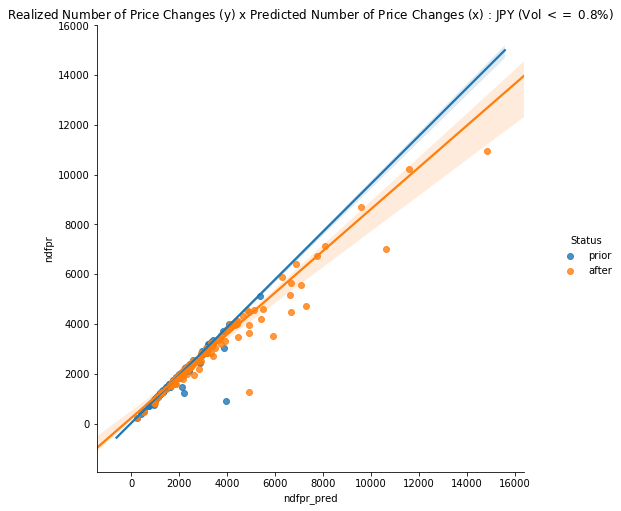

In [85]:
cme.regr_plot(OB_UZ_STATS[OB_UZ_STATS['rvxe']<=0.008], 'ndfpr_pred', 'ndfpr',\
    'Realized Number of Price Changes (y) x Predicted Number of Price Changes (x) : '+CURR+' (Vol $<=$ 0.8%)', True)

In [86]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'ndfpr_pred', 'ndfpr')

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     557.4
Date:                Fri, 06 Sep 2019   Prob (F-statistic):           1.68e-45
Time:                        01:05:51   Log-Likelihood:                -839.23
No. Observations:                 115   AIC:                             1682.
Df Residuals:                     113   BIC:                             1688.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        439.6385     61.401      7.160      0.0

In [87]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'ndfpr_pred', 'ndfpr')

                    Robust linear Model Regression Results                    
Dep. Variable:                  ndfpr   No. Observations:                  115
Model:                            RLM   Df Residuals:                      113
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 06 Sep 2019                                         
Time:                        01:05:51                                         
No. Iterations:                    32                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.2348      6.633      5.915      0.0

In [88]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'ndfpr_pred', 'ndfpr')

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     174.3
Date:                Fri, 06 Sep 2019   Prob (F-statistic):           2.51e-25
Time:                        01:05:51   Log-Likelihood:                -1117.0
No. Observations:                 125   AIC:                             2238.
Df Residuals:                     123   BIC:                             2244.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2195.7018    183.791     11.947      0.0

In [89]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, 'ndfpr_pred', 'ndfpr')

                    Robust linear Model Regression Results                    
Dep. Variable:                  ndfpr   No. Observations:                  125
Model:                            RLM   Df Residuals:                      123
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 06 Sep 2019                                         
Time:                        01:05:51                                         
No. Iterations:                     9                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1689.9434     77.367     21.843      0.0

In [90]:
cme.lin_reg(PRIOR_OB_UZ_STATS[PRIOR_OB_UZ_STATS['rvxe']<=0.008], 'ndfpr_pred', 'ndfpr')

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     763.0
Date:                Fri, 06 Sep 2019   Prob (F-statistic):           8.09e-52
Time:                        01:05:51   Log-Likelihood:                -804.84
No. Observations:                 114   AIC:                             1614.
Df Residuals:                     112   BIC:                             1619.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.8569     59.294      2.595      0.0

In [91]:
cme.lin_reg(AFTER_OB_UZ_STATS[AFTER_OB_UZ_STATS['rvxe']<=0.008], 'ndfpr_pred', 'ndfpr')

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1740.
Date:                Fri, 06 Sep 2019   Prob (F-statistic):           2.88e-73
Time:                        01:05:51   Log-Likelihood:                -915.28
No. Observations:                 122   AIC:                             1835.
Df Residuals:                     120   BIC:                             1840.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        406.1585     73.297      5.541      0.0

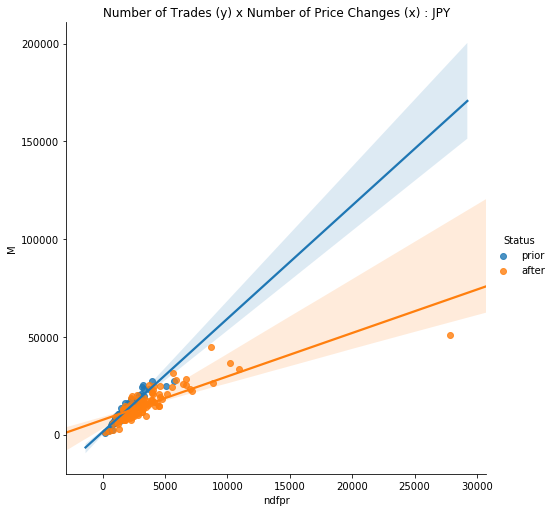

In [92]:
cme.regr_plot(OB_UZ_STATS, 'ndfpr', 'M',\
    'Number of Trades (y) x Number of Price Changes (x) : '+CURR)

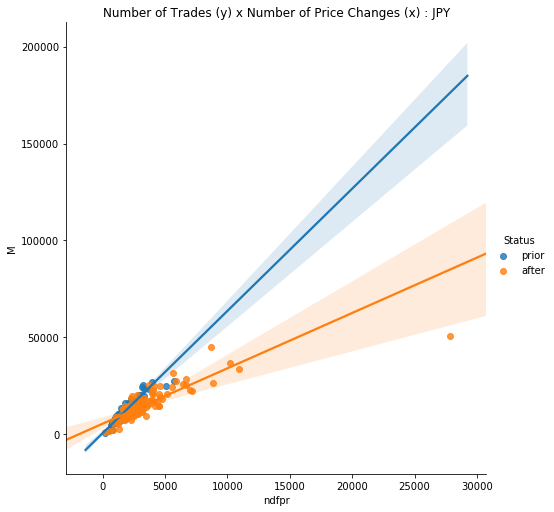

In [93]:
cme.regr_plot(OB_UZ_STATS, 'ndfpr', 'M',\
    'Number of Trades (y) x Number of Price Changes (x) : '+CURR, True)

In [94]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'ndfpr', 'M')

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     929.5
Date:                Fri, 06 Sep 2019   Prob (F-statistic):           2.38e-56
Time:                        01:05:58   Log-Likelihood:                -1022.4
No. Observations:                 115   AIC:                             2049.
Df Residuals:                     113   BIC:                             2054.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1366.4828    354.740      3.852      0.0

In [95]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'ndfpr', 'M')

                    Robust linear Model Regression Results                    
Dep. Variable:                      M   No. Observations:                  115
Model:                            RLM   Df Residuals:                      113
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 06 Sep 2019                                         
Time:                        01:05:58                                         
No. Iterations:                     8                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        557.4560    257.622      2.164      0.0

In [96]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'ndfpr', 'M')

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     284.0
Date:                Fri, 06 Sep 2019   Prob (F-statistic):           9.32e-34
Time:                        01:05:58   Log-Likelihood:                -1219.6
No. Observations:                 125   AIC:                             2443.
Df Residuals:                     123   BIC:                             2449.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7531.4512    569.757     13.219      0.0

In [97]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, 'ndfpr', 'M')

                    Robust linear Model Regression Results                    
Dep. Variable:                      M   No. Observations:                  125
Model:                            RLM   Df Residuals:                      123
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 06 Sep 2019                                         
Time:                        01:05:58                                         
No. Iterations:                    10                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5443.3538    419.009     12.991      0.0

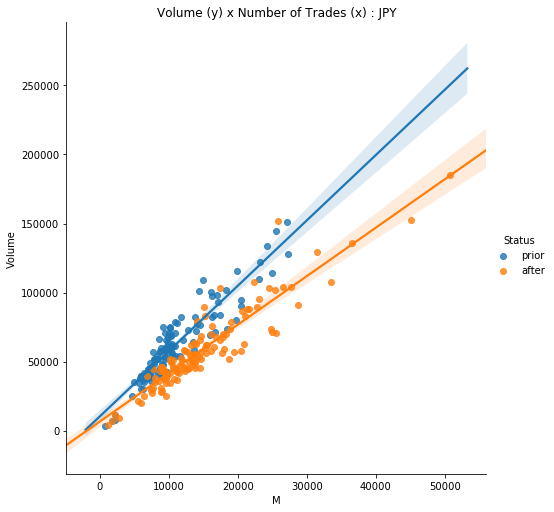

In [98]:
cme.regr_plot(OB_UZ_STATS, 'M', 'Volume',\
    'Volume (y) x Number of Trades (x) : '+CURR)

In [99]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'M', 'Volume')

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     773.8
Date:                Fri, 06 Sep 2019   Prob (F-statistic):           2.23e-52
Time:                        01:05:58   Log-Likelihood:                -1218.2
No. Observations:                 115   AIC:                             2440.
Df Residuals:                     113   BIC:                             2446.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.047e+04   2068.081      5.062      0.0

In [100]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'M', 'Volume')

                    Robust linear Model Regression Results                    
Dep. Variable:                 Volume   No. Observations:                  115
Model:                            RLM   Df Residuals:                      113
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 06 Sep 2019                                         
Time:                        01:05:58                                         
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9222.8858   2073.843      4.447      0.0

In [101]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'M', 'Volume')

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     754.0
Date:                Fri, 06 Sep 2019   Prob (F-statistic):           2.66e-54
Time:                        01:05:58   Log-Likelihood:                -1337.9
No. Observations:                 125   AIC:                             2680.
Df Residuals:                     123   BIC:                             2685.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6688.8913   2117.739      3.159      0.0

In [102]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, 'M', 'Volume')

                    Robust linear Model Regression Results                    
Dep. Variable:                 Volume   No. Observations:                  125
Model:                            RLM   Df Residuals:                      123
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 06 Sep 2019                                         
Time:                        01:05:58                                         
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6208.3399   1623.730      3.824      0.0

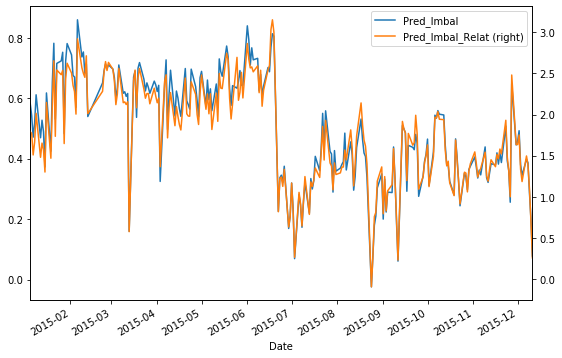

In [103]:
IMBAL_STATS_TS.drop(columns=['eta1']).plot(secondary_y=['Pred_Imbal_Relat'], figsize=(9,6));

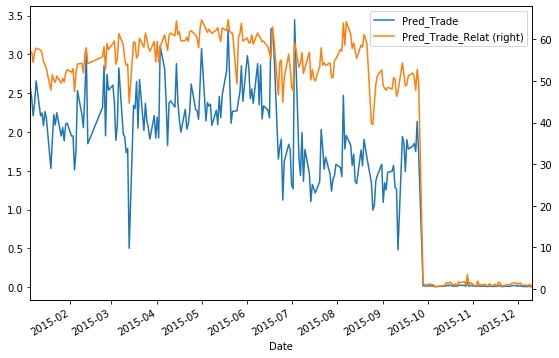

In [104]:
TRADE_STATS_TS.plot(secondary_y=['Pred_Trade_Relat'], figsize=(9,6));

In [105]:
OB_UZ_STATS_SPREADS = cme.spread_stats(OB_UZ_STATS)

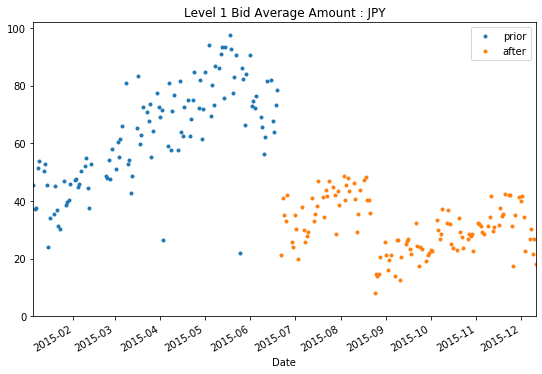

In [106]:
cme.time_series_plot(OB_UZ_STATS_SPREADS, 'bid1qty',\
    'Level 1 Bid Average Amount : '+CURR)

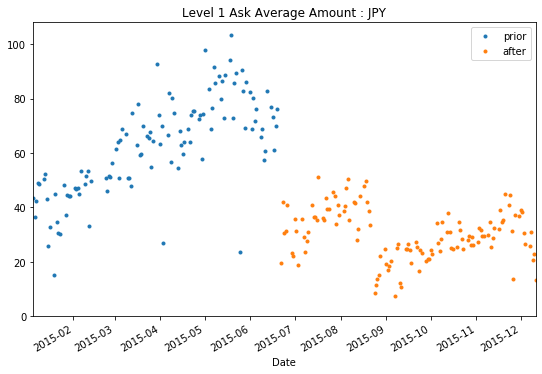

In [107]:
cme.time_series_plot(OB_UZ_STATS_SPREADS, 'ask1qty',\
    'Level 1 Ask Average Amount : '+CURR)

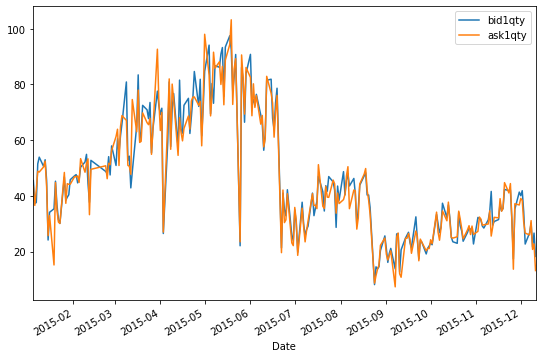

In [108]:
OB_UZ_STATS_SPREADS[['bid1qty', 'ask1qty']].plot(figsize=(9,6));

In [109]:
OB_UZ_STATS_SPREADS[OB_UZ_STATS_SPREADS['Status'] == 'prior'][['bid1qty', 'ask1qty']].mean()/\
    OB_UZ_STATS_SPREADS[OB_UZ_STATS_SPREADS['Status'] == 'after'][['bid1qty', 'ask1qty']].mean()

bid1qty    2.038205
ask1qty    2.075084
dtype: float64

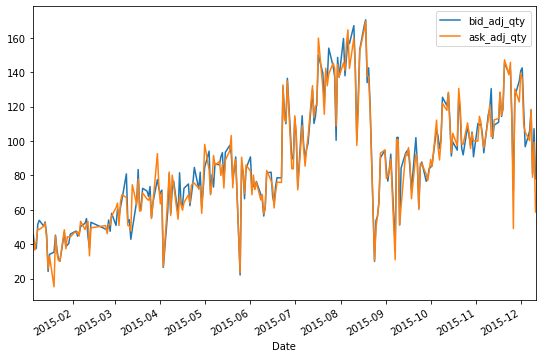

In [110]:
OB_UZ_STATS_SPREADS[['bid_adj_qty', 'ask_adj_qty']].plot(figsize=(9,6));

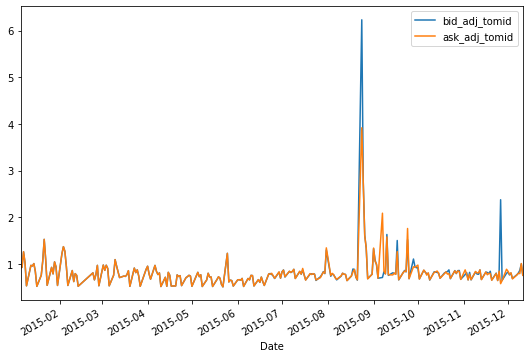

In [111]:
OB_UZ_STATS_SPREADS[['bid_adj_tomid', 'ask_adj_tomid']].plot(figsize=(9,6));

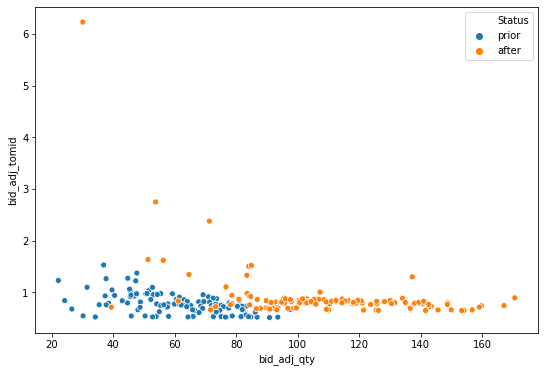

In [112]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='bid_adj_qty', y='bid_adj_tomid',\
                hue='Status', data=OB_UZ_STATS_SPREADS);

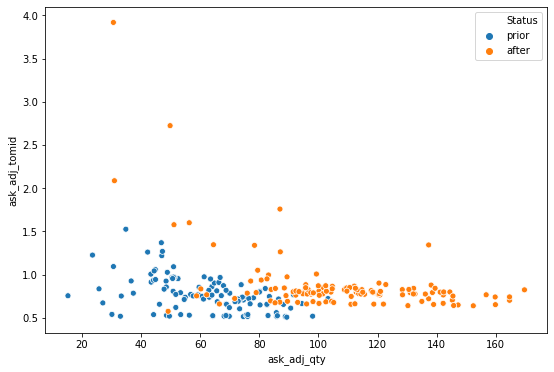

In [113]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='ask_adj_qty', y='ask_adj_tomid',\
                hue='Status', data=OB_UZ_STATS_SPREADS);

### Costs

In [114]:
PRIOR_MEAN_COST = cme.cost_mean(PRIOR_COST_STATS, 100)

In [115]:
PRIOR_MEAN_COST['Status'] = 'prior'

In [116]:
AFTER_MEAN_COST = cme.cost_mean(AFTER_COST_STATS, 100)

In [117]:
AFTER_MEAN_COST['Status'] = 'after'

In [118]:
MEAN_COST_STATS = pd.concat([PRIOR_MEAN_COST, AFTER_MEAN_COST], sort=False)

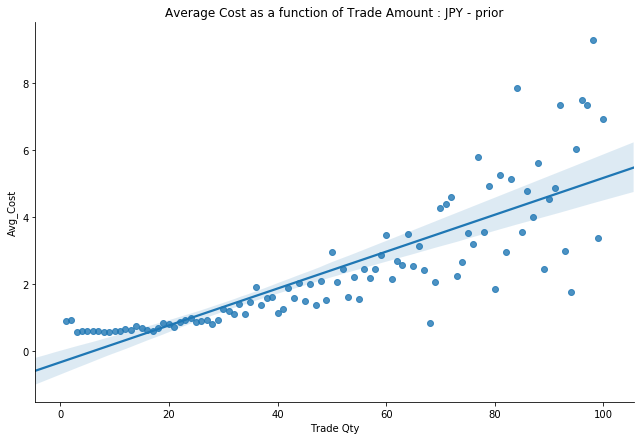

In [119]:
sns.lmplot(x='Trade Qty', y='Avg_Cost', data=PRIOR_MEAN_COST.reset_index(),\
          height=6, aspect=1.5);
plt.title('Average Cost as a function of Trade Amount : '+CURR+' - prior');

In [120]:
cme.lin_reg(cme.cost_mean(PRIOR_COST_STATS, 25).reset_index(), 'Trade Qty', 'Avg_Cost')

                            OLS Regression Results                            
Dep. Variable:               Avg_Cost   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     6.175
Date:                Fri, 06 Sep 2019   Prob (F-statistic):             0.0207
Time:                        01:06:01   Log-Likelihood:                 17.204
No. Observations:                  25   AIC:                            -30.41
Df Residuals:                      23   BIC:                            -27.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5967      0.052     11.417      0.0

In [121]:
cme.lin_reg_rob(cme.cost_mean(PRIOR_COST_STATS, 25).reset_index(), 'Trade Qty', 'Avg_Cost')

                    Robust linear Model Regression Results                    
Dep. Variable:               Avg_Cost   No. Observations:                   25
Model:                            RLM   Df Residuals:                       23
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 06 Sep 2019                                         
Time:                        01:06:01                                         
No. Iterations:                    20                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5162      0.036     14.219      0.0

In [122]:
cme.lin_reg(cme.cost_mean(PRIOR_COST_STATS, 50).reset_index(), 'Trade Qty', 'Avg_Cost')

                            OLS Regression Results                            
Dep. Variable:               Avg_Cost   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     120.6
Date:                Fri, 06 Sep 2019   Prob (F-statistic):           1.08e-14
Time:                        01:06:01   Log-Likelihood:                -6.2168
No. Observations:                  50   AIC:                             16.43
Df Residuals:                      48   BIC:                             20.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3247      0.080      4.044      0.0

In [123]:
cme.lin_reg_rob(cme.cost_mean(PRIOR_COST_STATS, 50).reset_index(), 'Trade Qty', 'Avg_Cost')

                    Robust linear Model Regression Results                    
Dep. Variable:               Avg_Cost   No. Observations:                   50
Model:                            RLM   Df Residuals:                       48
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 06 Sep 2019                                         
Time:                        01:06:01                                         
No. Iterations:                    28                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3337      0.066      5.090      0.0

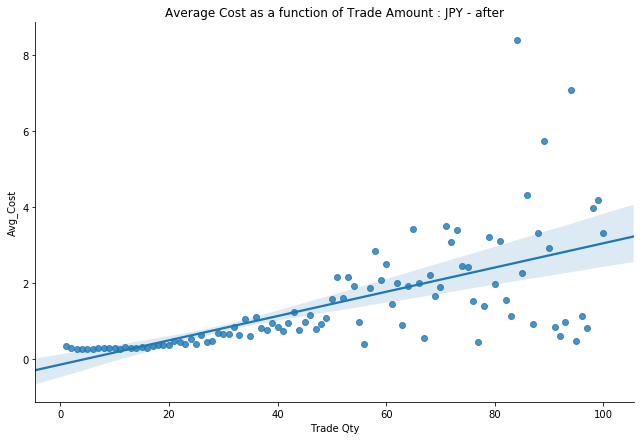

In [124]:
sns.lmplot(x='Trade Qty', y='Avg_Cost', data=AFTER_MEAN_COST.reset_index(),\
          height=6, aspect=1.5);
plt.title('Average Cost as a function of Trade Amount : '+CURR+' - after');

In [125]:
cme.lin_reg(cme.cost_mean(AFTER_COST_STATS, 25).reset_index(), 'Trade Qty', 'Avg_Cost')

                            OLS Regression Results                            
Dep. Variable:               Avg_Cost   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     33.10
Date:                Fri, 06 Sep 2019   Prob (F-statistic):           7.35e-06
Time:                        01:06:01   Log-Likelihood:                 42.165
No. Observations:                  25   AIC:                            -80.33
Df Residuals:                      23   BIC:                            -77.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2452      0.019     12.733      0.0

In [126]:
cme.lin_reg_rob(cme.cost_mean(AFTER_COST_STATS, 25).reset_index(), 'Trade Qty', 'Avg_Cost')

                    Robust linear Model Regression Results                    
Dep. Variable:               Avg_Cost   No. Observations:                   25
Model:                            RLM   Df Residuals:                       23
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 06 Sep 2019                                         
Time:                        01:06:01                                         
No. Iterations:                    21                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2499      0.011     21.933      0.0

In [127]:
cme.lin_reg(cme.cost_mean(AFTER_COST_STATS, 50).reset_index(), 'Trade Qty', 'Avg_Cost')

                            OLS Regression Results                            
Dep. Variable:               Avg_Cost   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     184.5
Date:                Fri, 06 Sep 2019   Prob (F-statistic):           4.61e-18
Time:                        01:06:01   Log-Likelihood:                 25.728
No. Observations:                  50   AIC:                            -47.46
Df Residuals:                      48   BIC:                            -43.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1011      0.042      2.386      0.0

In [128]:
cme.lin_reg_rob(cme.cost_mean(AFTER_COST_STATS, 50).reset_index(), 'Trade Qty', 'Avg_Cost')

                    Robust linear Model Regression Results                    
Dep. Variable:               Avg_Cost   No. Observations:                   50
Model:                            RLM   Df Residuals:                       48
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 06 Sep 2019                                         
Time:                        01:06:01                                         
No. Iterations:                    15                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1206      0.035      3.443      0.0

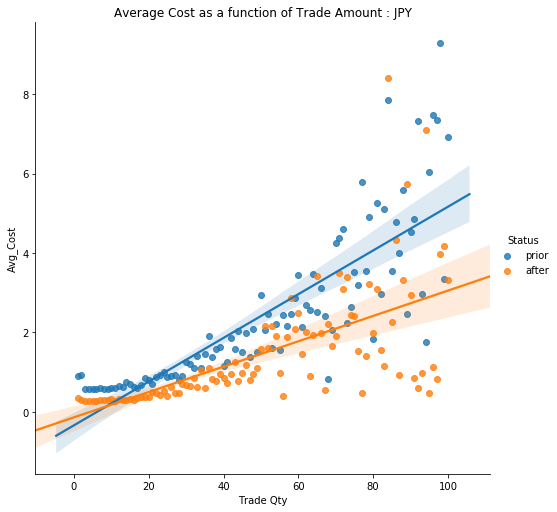

In [129]:
cme.regr_plot(MEAN_COST_STATS.reset_index(), 'Trade Qty', 'Avg_Cost',\
    'Average Cost as a function of Trade Amount : '+CURR)

## Eta prediction

In [130]:
# cme.plot_eta(TICK_PRIOR, TICK_AFTER,\
#     TABLE_MATHIEU.loc['prior']['eta1'], TABLE_MATHIEU.loc['after']['eta1'],\
#     TABLE_MATHIEU_ERR.loc['prior']['eta1'], TABLE_MATHIEU_ERR.loc['after']['eta1'],\
#     CURR)